In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [2]:
data=pd.read_csv('../input/airline-passenger-satisfaction/airline_passenger_satisfaction.csv')

# Exploring our Data

In [3]:
data

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,...,4,4,5,3,3,4,5,3,5,Satisfied


In [4]:
data.shape

(129880, 24)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [6]:
data.isnull().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

# Handling missing values

In [7]:
data = data.dropna()

In [8]:
data.isnull().sum()

ID                                        0
Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                

# Checking for outliers

In [9]:
data1 = data[['Departure and Arrival Time Convenience',
'Ease of Online Booking','Check-in Service', 'Online Boarding', 'Gate Location', 'On-board Service', 'Seat Comfort', 'Leg Room Service',
'Cleanliness', 'Food and Drink', 'In-flight Service', 'In-flight Wifi Service', 'In-flight Entertainment', 'Baggage Handling']]

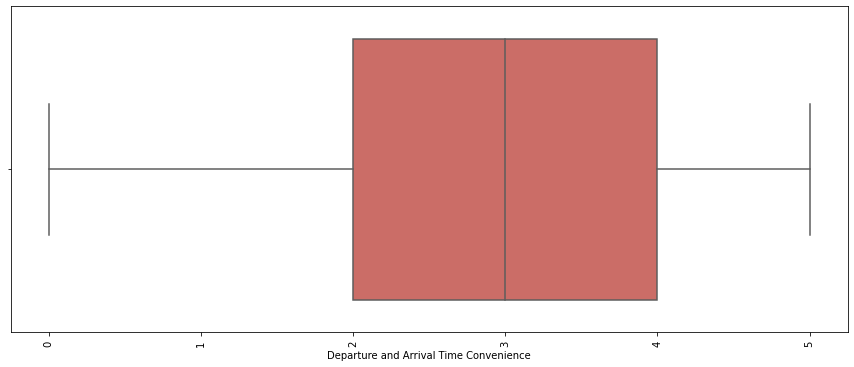

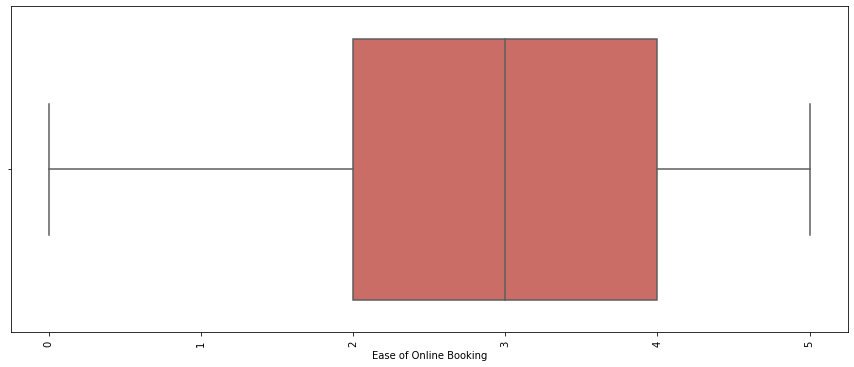

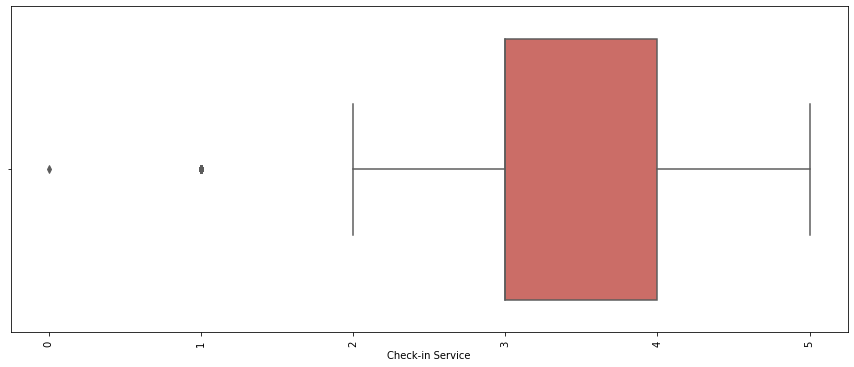

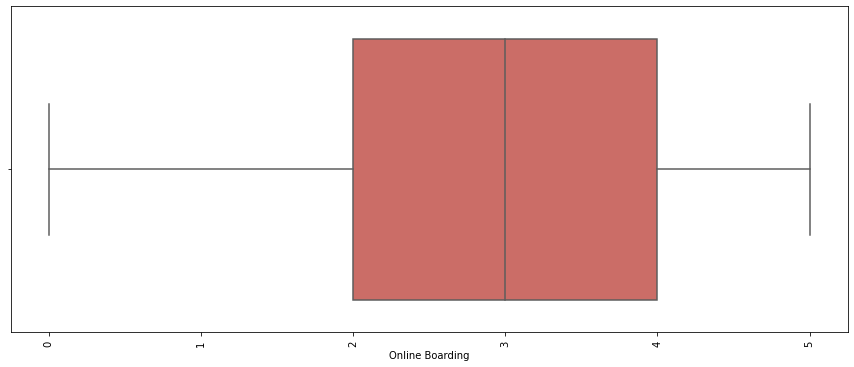

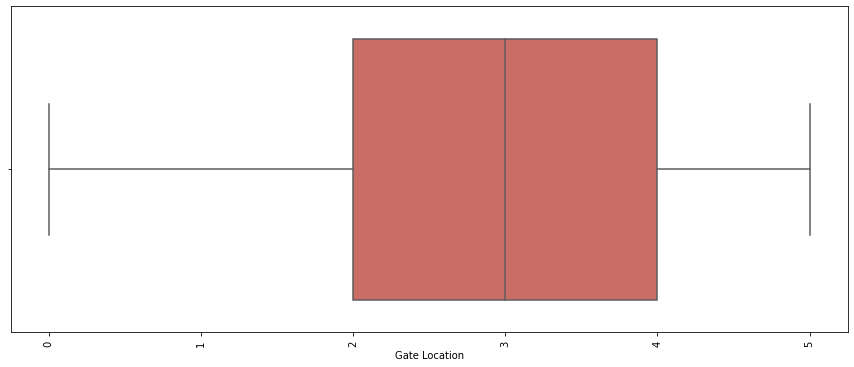

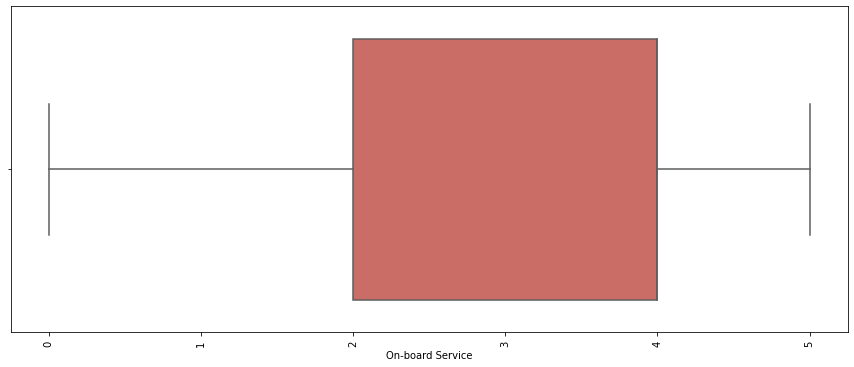

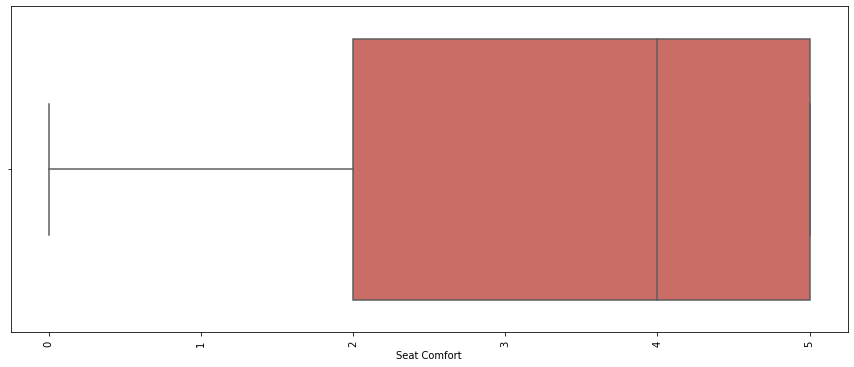

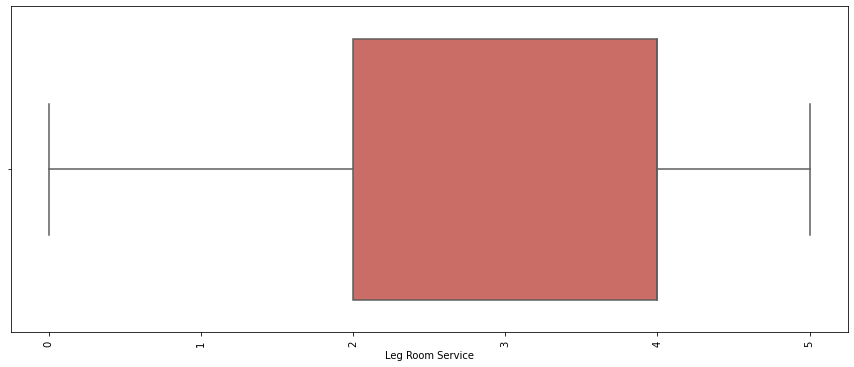

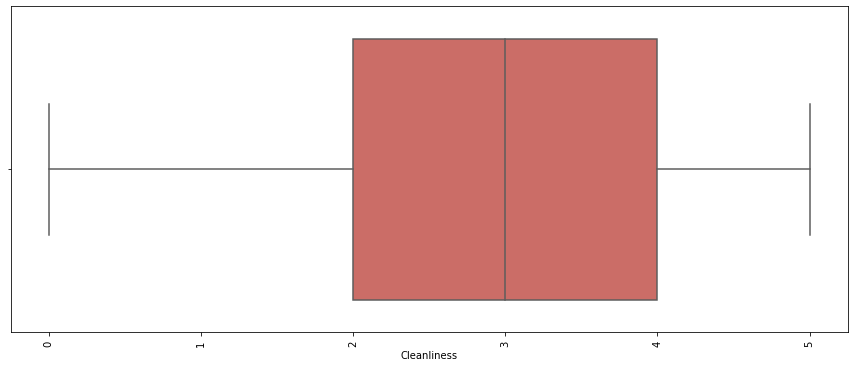

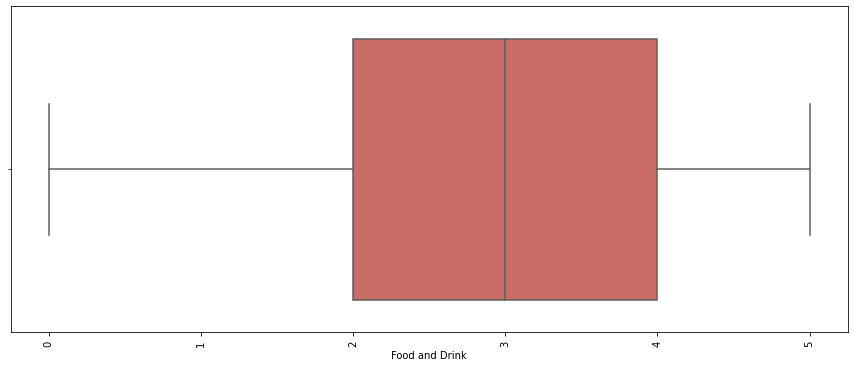

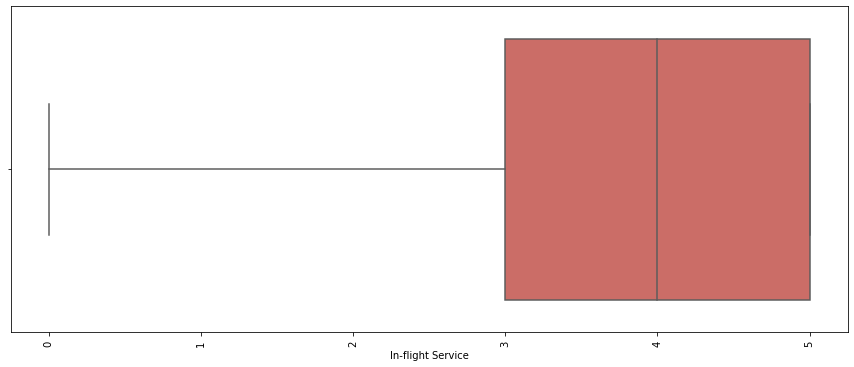

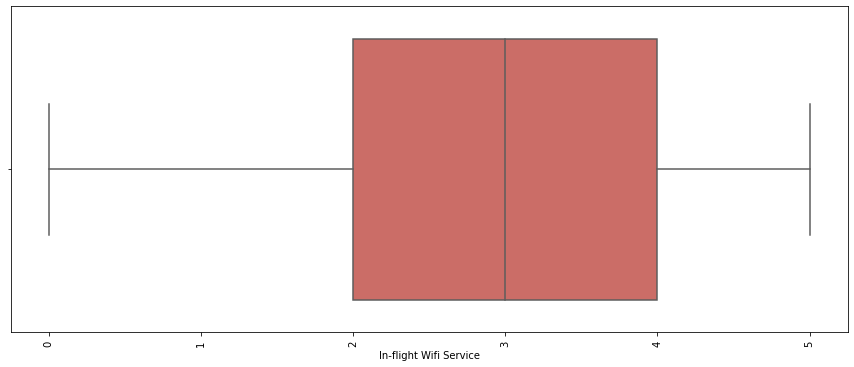

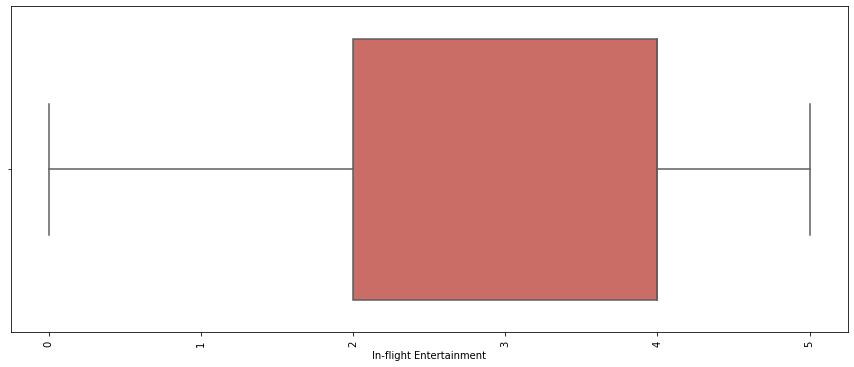

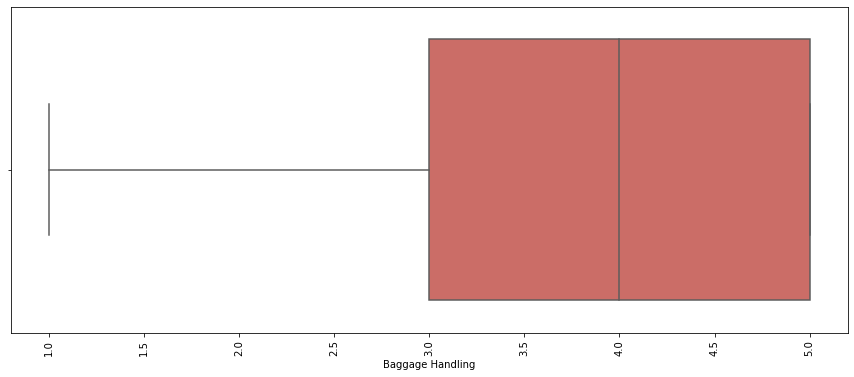

In [10]:
for j in data1.columns:
    plt.figure(figsize=(15,6))
    sns.boxplot(x=data[j][1:], data=data.iloc[:1],
                order=data1[j][1:].value_counts().index,
                palette='hls')
    plt.xticks(rotation=90)
    plt.show()

# Encoding our data

In [11]:
columns= data[['Gender', 'Customer Type', 'Type of Travel','Class', 'Satisfaction']]

In [12]:
label_encoder = preprocessing.LabelEncoder()

In [13]:
columns = columns.apply(label_encoder.fit_transform)

In [14]:
columns.head()

,Gender,Customer Type,Type of Travel,Class,Satisfaction
0,1,0,0,0,0
1,0,1,0,0,1
2,1,1,0,0,1
3,1,1,0,0,1
4,0,1,0,0,1


In [15]:
data[list(columns.columns)] = columns
data = data.apply(pd.to_numeric, errors='coerce')
data.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,1,48,0,0,0,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,0
1,2,0,35,1,0,0,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,1
2,3,1,41,1,0,0,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,1
3,4,1,50,1,0,0,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,1
4,5,0,49,1,0,0,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,1


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129487 non-null  int64  
 1   Gender                                  129487 non-null  int64  
 2   Age                                     129487 non-null  int64  
 3   Customer Type                           129487 non-null  int64  
 4   Type of Travel                          129487 non-null  int64  
 5   Class                                   129487 non-null  int64  
 6   Flight Distance                         129487 non-null  int64  
 7   Departure Delay                         129487 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129487 non-null  int64  
 10  Ease of Online Booking                  1294

Text(0.5, 1.0, 'Correlation coefficient between different features and Satisfaction ')

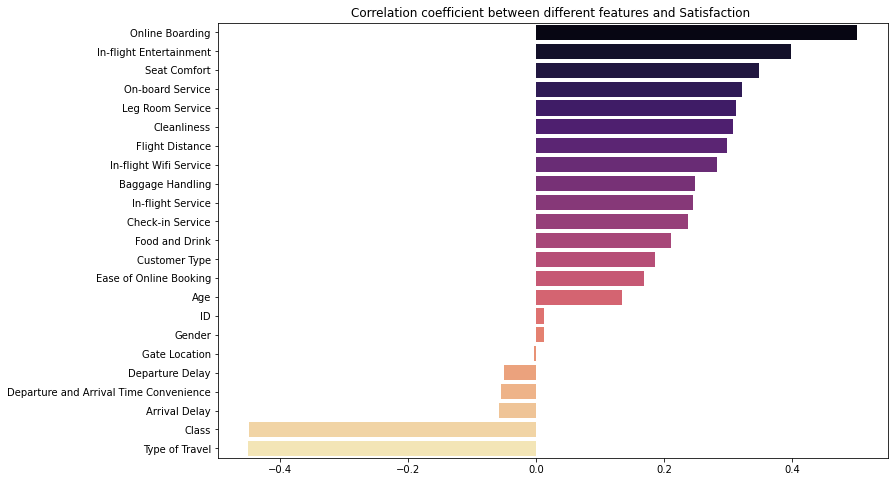

In [17]:
plt.figure(figsize=(12,8))
data_4 = data.corr()["Satisfaction"].sort_values(ascending=False)
indices = data_4.index
labels = []
corr = []
for i in range(1, len(indices)):
    labels.append(indices[i])
    corr.append(data_4[i])
sns.barplot(x=corr, y=labels, palette='magma')
plt.title('Correlation coefficient between different features and Satisfaction ')

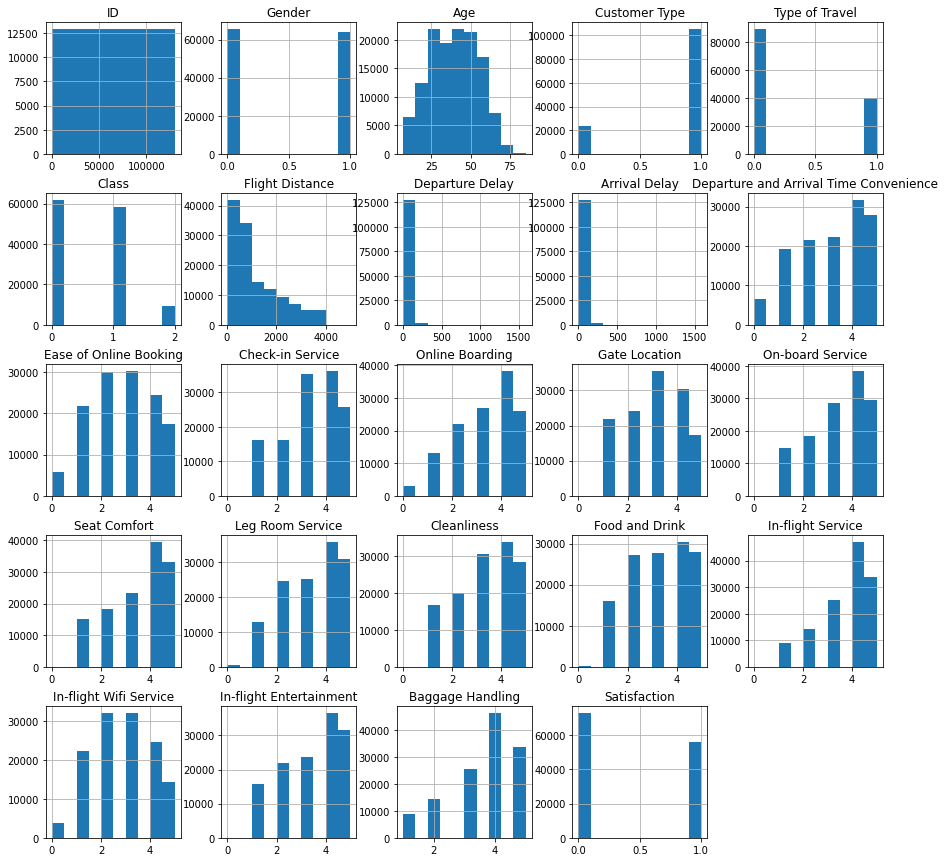

In [18]:
data.hist(figsize=(15,15))
plt.show()

# Spliting the Data

In [19]:
y =data.Satisfaction.to_numpy()
data.drop(columns=['ID', 'Satisfaction'], inplace=True)
X = data

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [21]:
X = pd.DataFrame(scaler.fit_transform(X),columns = X.columns)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size= 0.25 , random_state=42)

# Appling the models WITHOUT Feature Selection

In [24]:
lr = LogisticRegression()

In [25]:
lr.fit(x_train , y_train)

LogisticRegression()

In [26]:
lr.score(x_train, y_train)

0.8746640580754775

In [27]:
from sklearn.metrics import mean_absolute_error
yhat = lr.predict(x_test)
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 0.127


In [28]:
kNN = KNeighborsClassifier(n_neighbors=7)

In [29]:
kNN.fit(x_train , y_train)

KNeighborsClassifier(n_neighbors=7)

In [30]:
kNN.score(x_train , y_train)

0.9446738402924368

In [31]:
kNN.score(x_test, y_test)

0.9291362906215248

In [32]:
yhat = kNN.predict(x_test)
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 0.071


# Using Feature selection technique [RFE]

In [33]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [34]:
# Feature extraction
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=21)
fit = rfe.fit(X, y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 21
Selected Features: [ True  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True]
Feature Ranking: [1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [35]:
fit

RFE(estimator=LogisticRegression(), n_features_to_select=21)

In [36]:
features = fit.transform(X)

In [37]:
d=pd.DataFrame(features)

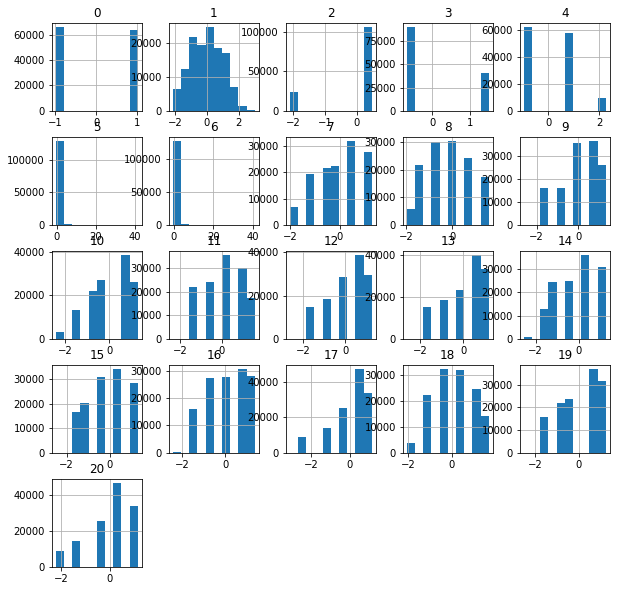

In [38]:
d.hist(figsize=(10,10))
plt.show()

In [39]:
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size = 0.2, random_state = 4)

In [40]:
lr = LogisticRegression()
lr.fit(X_train , y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.8747550415584666
0.8738512626457642


In [41]:
kNN = KNeighborsClassifier(n_neighbors=7)

In [42]:
kNN.fit(X_train , y_train)

KNeighborsClassifier(n_neighbors=7)

In [43]:
kNN.score(X_train , y_train)

0.9462587726496057

In [44]:
kNN.score(X_test, y_test)

0.9308826936442969

In [45]:
yhat = kNN.predict(X_test)
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 0.069
